### calculate the South Pacific Subtropical Index from the ERSST V5 dataset


see:  
    
+ [https://climatedataguide.ucar.edu/climate-data/sst-data-noaa-extended-reconstruction-ssts-version-5](https://climatedataguide.ucar.edu/climate-data/sst-data-noaa-extended-reconstruction-ssts-version-5)5
+ [ftp://ftp.ncdc.noaa.gov/pub/data/cmb/ersst/v4/netcdf/](ftp://ftp.ncdc.noaa.gov/pub/data/cmb/ersst/v5/netcdf/)

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

In [10]:
import os
import sys
import pathlib
import numpy as np
import pandas as pd
from datetime import (datetime, timedelta)
from dateutil import parser
from scipy.stats import zscore

In [11]:
import xarray as xr

In [12]:
HOME = pathlib.Path.home()

In [13]:
dpath = HOME.joinpath("research/CPP/indices/data/ERSSTV5")

In [14]:
lfiles_ersst = list(dpath.glob("*.nc"))

In [15]:
lfiles_ersst.sort()

In [16]:
lfiles_ersst[0]

PosixPath('/home/nicolasf/research/CPP/indices/data/ERSSTV5/ersst.v5.185401.nc')

In [17]:
lfiles_ersst[-1]

PosixPath('/home/nicolasf/research/CPP/indices/data/ERSSTV5/ersst.v5.202003.nc')

### keep only 1950 onwards 

In [20]:
start_year = 1950

In [21]:
(start_year - 1854 + 1) * 12

1164

In [22]:
lfiles_ersst = lfiles_ersst[(start_year - 1854) * 12:]

In [23]:
lfiles_ersst[0]

PosixPath('/home/nicolasf/research/CPP/indices/data/ERSSTV5/ersst.v5.195001.nc')

In [24]:
lfiles_ersst[-1]

PosixPath('/home/nicolasf/research/CPP/indices/data/ERSSTV5/ersst.v5.202003.nc')

In [25]:
d = []
for fname in lfiles_ersst:
#     print(f"opening {fname}")
    dset = xr.open_dataset(fname, decode_times=False)
    dset = dset.squeeze() 
    if 'lev' in dset.coords:
        dset = dset.drop('lev')
    dset = dset.sel(lat=slice(-65,-20), lon=slice(100,300))
    d.append(dset)

In [26]:
dset = xr.concat(d, dim='time')

In [27]:
dset

<xarray.Dataset>
Dimensions:  (lat: 23, lon: 101, time: 843)
Coordinates:
  * lat      (lat) float64 -64.0 -62.0 -60.0 -58.0 ... -26.0 -24.0 -22.0 -20.0
  * lon      (lon) float64 100.0 102.0 104.0 106.0 ... 294.0 296.0 298.0 300.0
  * time     (time) float64 0.0 0.0 0.0 0.0 ... 5.369e+04 5.369e+04 5.369e+04
Data variables:
    sst      (time, lat, lon) float32 -1.0114417 -0.5003091 ... nan nan
    ssta     (time, lat, lon) float32 -0.7601501 -0.5641772 ... nan nan
Attributes:
    Conventions:                CF-1.6, ACDD-1.3
    metadata_link:              https://doi.org/10.7289/V5T72FNM
    id:                         ersst.v5.195001
    naming_authority:           gov.noaa.ncei
    title:                      NOAA ERSSTv5 (in situ only)
    summary:                    ERSST.v5 is developped based on v4 after revi...
    institution:                NOAA/NESDIS/NCEI/CCOG
    creator_name:               Boyin Huang
    creator_email:              boyin.huang@noaa.gov
    date_created:               2017-06-30T12:18:00Z
    date_modified:              2017-06-30T12:18:00Z
    product_version:            Version 5
    history:                    Fri Jun 30 12:32:44 2017: ncatted -O -a _Fill...
    creator_url:                https://www.ncei.noaa.gov
    license:                    No constraints on data access or use
    time_coverage_start:        1950-01-01T00:00:00Z
    time_coverage_end:          1950-02-01T00:00:00Z
    geospatial_lon_min:         -1.0
    geospatial_lon_max:         359.0
    geospatial_lat_min:         -89.0
    geospatial_lat_max:         89.0
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  2.0
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  2.0
    spatial_resolution:         2.0 degree grid
    cdm_data_type:              Grid
    processing_level:           NOAA Level 4
    standard_name_vocabulary:   CF Standard Name Table (v40, 25 January 2017)
    keywords:                   Earth Science > Oceans > Ocean Temperature > ...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    project:                    NOAA Extended Reconstructed Sea Surface Tempe...
    platform:                   Ship and Buoy SSTs from ICOADS R3.0 and NCEP GTS
    instrument:                 Conventional thermometers
    source:                     In situ data: ICOADS R3.0 before 2015, NCEP i...
    comment:                    SSTs were observed by conventional thermomete...
    references:                 Huang et al, 2017: Extended Reconstructed Sea...
    climatology:                Climatology is based on 1971-2000 SST, Xue, Y...

In [28]:
dset['time'] = (('time'), pd.date_range(start=f'{start_year}-01-01', periods=len(dset['time']), freq='MS'))

In [29]:
dset

<xarray.Dataset>
Dimensions:  (lat: 23, lon: 101, time: 843)
Coordinates:
  * lat      (lat) float64 -64.0 -62.0 -60.0 -58.0 ... -26.0 -24.0 -22.0 -20.0
  * lon      (lon) float64 100.0 102.0 104.0 106.0 ... 294.0 296.0 298.0 300.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2020-03-01
Data variables:
    sst      (time, lat, lon) float32 -1.0114417 -0.5003091 ... nan nan
    ssta     (time, lat, lon) float32 -0.7601501 -0.5641772 ... nan nan
Attributes:
    Conventions:                CF-1.6, ACDD-1.3
    metadata_link:              https://doi.org/10.7289/V5T72FNM
    id:                         ersst.v5.195001
    naming_authority:           gov.noaa.ncei
    title:                      NOAA ERSSTv5 (in situ only)
    summary:                    ERSST.v5 is developped based on v4 after revi...
    institution:                NOAA/NESDIS/NCEI/CCOG
    creator_name:               Boyin Huang
    creator_email:              boyin.huang@noaa.gov
    date_created:               2017-06-30T12:18:00Z
    date_modified:              2017-06-30T12:18:00Z
    product_version:            Version 5
    history:                    Fri Jun 30 12:32:44 2017: ncatted -O -a _Fill...
    creator_url:                https://www.ncei.noaa.gov
    license:                    No constraints on data access or use
    time_coverage_start:        1950-01-01T00:00:00Z
    time_coverage_end:          1950-02-01T00:00:00Z
    geospatial_lon_min:         -1.0
    geospatial_lon_max:         359.0
    geospatial_lat_min:         -89.0
    geospatial_lat_max:         89.0
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  2.0
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  2.0
    spatial_resolution:         2.0 degree grid
    cdm_data_type:              Grid
    processing_level:           NOAA Level 4
    standard_name_vocabulary:   CF Standard Name Table (v40, 25 January 2017)
    keywords:                   Earth Science > Oceans > Ocean Temperature > ...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    project:                    NOAA Extended Reconstructed Sea Surface Tempe...
    platform:                   Ship and Buoy SSTs from ICOADS R3.0 and NCEP GTS
    instrument:                 Conventional thermometers
    source:                     In situ data: ICOADS R3.0 before 2015, NCEP i...
    comment:                    SSTs were observed by conventional thermomete...
    references:                 Huang et al, 2017: Extended Reconstructed Sea...
    climatology:                Climatology is based on 1971-2000 SST, Xue, Y...

### function to remove climatological average

In [30]:
def demean(x): 
    return x - x.sel(time=slice('1981','2010')).mean('time')

### calculates the anomalies WRT to climatology

In [31]:
sst_anoms = dset['sst'].groupby('time.month').apply(demean)

### calculates the SPSD

The SPSD is calculated as the standardised difference between the monthly SST anomalies in the northwest subtropical Pacific (50-35S / 170E-10W) and the southeast extra-tropical Pacific (57.5 - 45S, 140E - 120W) from the ERSST (v4) SST dataset

### extract the NW pole of the dipole

In [32]:
sst_anoms

<xarray.DataArray 'sst' (time: 843, lat: 23, lon: 101)>
array([[[-0.18522811, -0.2246767 , -0.37321487, ..., -0.40377247,
         -0.33915165, -0.3962713 ],
        [-0.28789937, -0.36724323, -0.42758542, ..., -0.73661613,
         -0.65443665, -0.60377336],
        [-0.35615098, -0.43708885, -0.5182657 , ..., -0.8729956 ,
         -0.7804203 , -0.6925976 ],
        ...,
        [ 0.66171837,  0.70814514,  0.82450485, ...,         nan,
                 nan,         nan],
        [ 0.67497444,  0.73163605,  0.84310913, ...,         nan,
                 nan,         nan],
        [ 0.64839745,  0.7137699 ,  0.8175049 , ...,         nan,
                 nan,         nan]],

       [[-0.8197465 , -0.9384653 , -0.68668866, ..., -0.1917659 ,
         -0.21683723, -0.2967475 ],
        [-0.08156586, -0.13567972, -0.18501091, ..., -0.33607686,
         -0.36207938, -0.3842225 ],
        [-0.07686818, -0.11999285, -0.17170846, ..., -0.46068597,
         -0.44517994, -0.42590904],
...
        [ 0.61704063,  0.5472641 ,  0.5238857 , ...,         nan,
                 nan,         nan],
        [ 0.64704514,  0.59524536,  0.60401917, ...,         nan,
                 nan,         nan],
        [ 0.6118412 ,  0.58862877,  0.6295147 , ...,         nan,
                 nan,         nan]],

       [[ 0.20754717,  0.20005399,  0.16803281, ..., -0.09528136,
         -0.18548676, -0.26185292],
        [ 0.27132505,  0.23017526,  0.18530041, ...,  0.15357757,
          0.04385662, -0.03640819],
        [ 0.3071648 ,  0.28912675,  0.25349545, ...,  0.35728407,
          0.27028465,  0.20432186],
        ...,
        [ 0.68943787,  0.68447304,  0.6907501 , ...,         nan,
                 nan,         nan],
        [ 0.8122997 ,  0.83390236,  0.86803055, ...,         nan,
                 nan,         nan],
        [ 0.89243317,  0.9440861 ,  1.0076904 , ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -64.0 -62.0 -60.0 -58.0 ... -26.0 -24.0 -22.0 -20.0
  * lon      (lon) float64 100.0 102.0 104.0 106.0 ... 294.0 296.0 298.0 300.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2020-03-01

In [34]:
NW_pole = sst_anoms.sel(lat=slice(-50.,-35), lon=slice(170.,190.)).mean('lat').mean('lon')

In [35]:
NW_pole = NW_pole.to_dataframe()[['sst']]

In [36]:
NW_pole.columns = ['NW_pole']

In [37]:
NW_pole.head()

,NW_pole
time,
1950-01-01,0.636040
1950-02-01,0.008213
1950-03-01,-0.386838
1950-04-01,0.098148
1950-05-01,0.379086


### extract the SE pole of the dipole

In [41]:
SE_pole = sst_anoms.sel(lat=slice(-57.5,-45.), lon=slice(220.,240.)).mean('lat').mean('lon')

In [42]:
SE_pole = SE_pole.to_dataframe()[['sst']]

In [43]:
SE_pole.columns = ['SE_pole']

In [44]:
SE_pole.head()

,SE_pole
time,
1950-01-01,-0.544901
1950-02-01,-0.979526
1950-03-01,-1.610508
1950-04-01,-0.630996
1950-05-01,0.046073


### concatenate

In [45]:
df = pd.concat((NW_pole, SE_pole), axis=1)

In [46]:
df.head()

,NW_pole,SE_pole
time,,
1950-01-01,0.636040,-0.544901
1950-02-01,0.008213,-0.979526
1950-03-01,-0.386838,-1.610508
1950-04-01,0.098148,-0.630996
1950-05-01,0.379086,0.046073


In [47]:
df.head()

,NW_pole,SE_pole
time,,
1950-01-01,0.636040,-0.544901
1950-02-01,0.008213,-0.979526
1950-03-01,-0.386838,-1.610508
1950-04-01,0.098148,-0.630996
1950-05-01,0.379086,0.046073


### normalise

In [48]:
dfs = df.apply(zscore)

### calculates the dipole index

In [49]:
dfs.loc[:,'dipole'] = dfs.loc[:,'NW_pole'] - dfs.loc[:,'SE_pole']

<AxesSubplot:xlabel='time'>

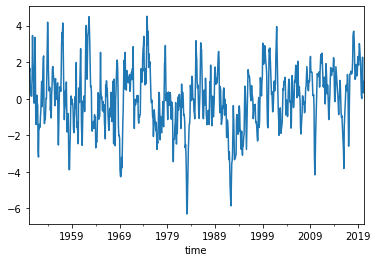

In [50]:
dfs.loc[:,'dipole'].plot()

### normalise

In [51]:
dfs.loc[:,'dipole_std'] = zscore(dfs.loc[:,'dipole'])

<AxesSubplot:xlabel='time'>

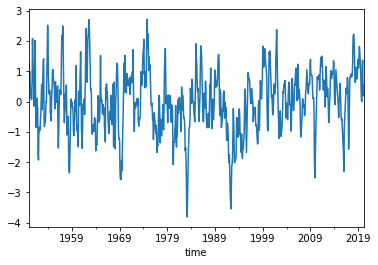

In [52]:
dfs.loc[:,'dipole_std'].plot()

In [53]:
dfs

,NW_pole,SE_pole,dipole,dipole_std
time,,,,
1950-01-01,1.384364,-0.692077,2.076441,1.253828
1950-02-01,0.008073,-1.439792,1.447865,0.874272
1950-03-01,-0.857937,-2.525317,1.667380,1.006823
1950-04-01,0.205225,-0.840192,1.045417,0.631260
1950-05-01,0.821083,0.324620,0.496463,0.299782
...,...,...,...,...
2019-11-01,1.693146,0.559453,1.133693,0.684564
2019-12-01,2.432981,0.164069,2.268911,1.370048
2020-01-01,1.044784,0.615974,0.428811,0.258931


### select just the dipole mode 

In [54]:
spsd = dfs.loc[:,['dipole']]

In [57]:
spsd.columns = ['SPSD']

### calculates the seasonal anomalies 

In [60]:
spsd = spsd.rolling(window=3, min_periods=3).mean()

In [61]:
spsd = spsd.iloc[2:,:]

In [62]:
spsd

,SPSD
time,
1950-03-01,1.730562
1950-04-01,1.386888
1950-05-01,1.069753
1950-06-01,0.567056
1950-07-01,0.271011
...,...
2019-11-01,0.446091
2019-12-01,1.136763
2020-01-01,1.277138


In [63]:
opath = pathlib.Path("/media/nicolasf/END19101/data/observational_indices/SPSD")

In [64]:
if not opath.exists(): 
    opath.mkdir(parents=True)

In [65]:
spsd.to_csv(opath.joinpath("SPSD.csv"))